In [1]:
import cv2
import matplotlib.pyplot as plt
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import easyocr
from PIL import Image, ImageEnhance
import numpy as np

Using CPU. Note: This module is much faster with a GPU.


[[[[10, 16], [36, 16], [36, 50], [10, 50]], 'F']]


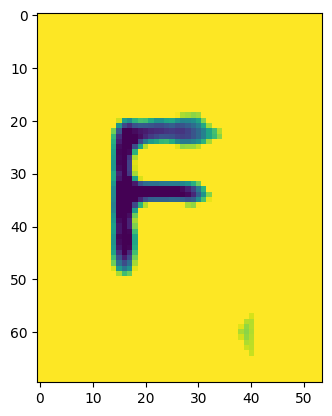

In [254]:

reader = easyocr.Reader(['fr'], gpu=False) 
res = reader.readtext(img, paragraph=True)

plt.imshow(img)
print(res)

In [255]:
import pytesseract

In [256]:

img = Image.open(path)
# img = preprocess_image(path)

text = pytesseract.image_to_string(img)
    
print(text)

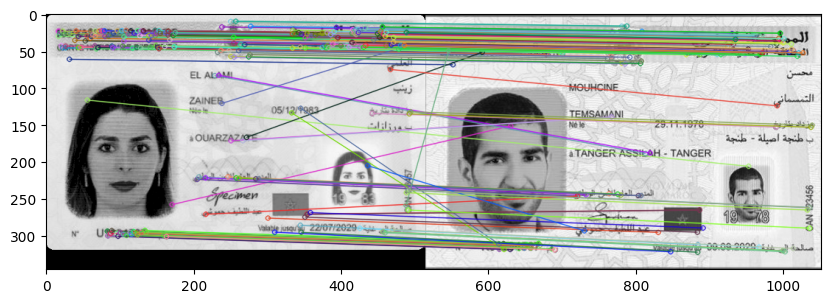

In [3]:
import cv2
import matplotlib.pyplot as plt 
# Load the images
image_original = cv2.imread(r'C:\Users\pc\Desktop\lp BigData\s6\ids\new_card\id_2_1.jpg', cv2.IMREAD_GRAYSCALE)
image_rotated = cv2.imread(r'C:\Users\pc\Desktop\lp BigData\s6\ids\new_card\id_2_3.jpg', cv2.IMREAD_GRAYSCALE)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints_original, descriptors_original = sift.detectAndCompute(image_original, None)
keypoints_rotated, descriptors_rotated = sift.detectAndCompute(image_rotated, None)

# Match descriptors using FLANN (Fast Library for Approximate Nearest Neighbors)
flann = cv2.FlannBasedMatcher(dict(algorithm=1, trees=5), dict(checks=50))
matches = flann.knnMatch(descriptors_original, descriptors_rotated, k=2)

# Ratio test to find good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)


image_matches = cv2.drawMatches(image_original, keypoints_original, image_rotated, keypoints_rotated, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

image_matches_rgb = cv2.cvtColor(image_matches, cv2.COLOR_BGR2RGB)

# Display image with matches
plt.figure(figsize=(10, 8))
# Draw matches
plt.imshow(image_matches)



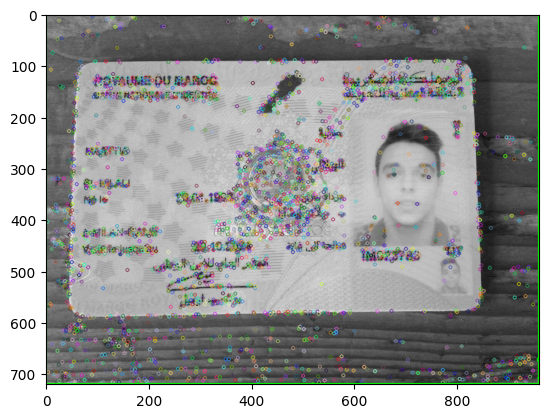

In [136]:
import cv2
import numpy as np

def detect_and_crop_card(image_path):
    # Load the image
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Create a SIFT object
    sift = cv2.SIFT_create()

    # Detect keypoints and compute descriptors
    keypoints, descriptors = sift.detectAndCompute(gray, None)

    # If not enough keypoints are found, return None
    if len(keypoints) < 4:
        return None

    # Convert keypoints to numpy array
    pts = np.float32([kp.pt for kp in keypoints])

    # Find a homography to warp the image to a top-down view (assuming the card is planar)
    if len(pts) >= 4:
        # Sort keypoints by y-coordinate
        pts = pts[np.argsort(pts[:, 1])]

        # Estimate homography using RANSAC
        h, _ = cv2.findHomography(pts[:4], np.array([[0, 0], [0, 1], [1, 1], [1, 0]]))

        # Warp the image to a top-down view
        warped_img = cv2.warpPerspective(img, h, (img.shape[1], img.shape[0]))

        # Crop the card
        gray_warped = cv2.cvtColor(warped_img, cv2.COLOR_BGR2GRAY)
        _, thresh = cv2.threshold(gray_warped, 1, 255, cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        x, y, w, h = cv2.boundingRect(contours[0])
        cropped_card = warped_img[y:y+h, x:x+w]

        return cropped_card

    else:
        return None

# Example usage
image_path = r'C:\Users\pc\Desktop\lp BigData\s6\test_crop\test.jpg'
cropped_card = detect_and_crop_card(image_path)

if cropped_card is not None:
    cv2.imshow("Cropped Card", cropped_card)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Not enough keypoints found to detect the card.")




In [3]:

import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt 
# Load a pretrained YOLOv8n model
model = YOLO(r'C:\Users\pc\Desktop\lp BigData\s6\moroccan_idCard_scanner\model\train5\weights\best.pt')

# Define path to the image file
source = r'C:\Users\pc\Downloads\Telegram Desktop\crop.jpg'
img =cv2.imread(source)
# Run inference on the source
results = model(img, conf=0, max_det=1) 
results[0].show()



0: 640x480 1 idcard, 274.0ms
Speed: 8.9ms preprocess, 274.0ms inference, 67.0ms postprocess per image at shape (1, 3, 640, 480)


In [ ]:
import matplotlib.pyplot as plt 
import cv2

box  = results[0].boxes.xyxy.tolist() 
x1, y1, x2, y2 = box[0]
print(box[0])
img =cv2.imread(source)
cropped_img = img[int(y1):int(y2), int(x1):int(x2)]
cv2.imwrite('test0000.jpg', cropped_img)

[441.7920837402344, 1643.558349609375, 2538.46337890625, 2984.01708984375]


True

In [ ]:
def preprocess_image():   
    image = cv2.imread(image_path)
    
    pil_image = Image.fromarray(cv2.cvtColor(image_path, cv2.COLOR_BGR2RGB))
    
    enhancer = ImageEnhance.Contrast(pil_image)
    contrast_img = enhancer.enhance(1.5)

    enhancer = ImageEnhance.Brightness(contrast_img)
    bright_img = enhancer.enhance(1.8)

    sharper = ImageEnhance.Sharpness(bright_img)
    sharper_img = sharper.enhance(1.5)

    enhanced_image = cv2.cvtColor(np.array(sharper_img), cv2.COLOR_RGB2BGR)
    
    gray = cv2.cvtColor(image_path, cv2.COLOR_BGR2GRAY)
    binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

    blurred = cv2.GaussianBlur(binary, (5, 5), 0)


    unsharp_mask = cv2.addWeighted(gray, 2, blurred, -1, 0)
    cv2.imwrite('test.jpg', unsharp_mask)
    return unsharp_mask

    

preprocess_image()


In [ ]:
import new_back_cin , crop
import cv2

image = cv2.imread(r"image_1.jpg")

croped = crop.crop(image)



0: 640x480 1 idcard, 165.2ms
Speed: 7.2ms preprocess, 165.2ms inference, 24.2ms postprocess per image at shape (1, 3, 640, 480)


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected text: N' (Confidence: 0.86)
Detected text: 0359550 (Confidence: 0.69)
Detected text: aë (Confidence: 0.09)
Detected text: Valable jusqu'au (Confidence: 1.00)
Detected text: 31.05.2030 (Confidence: 0.89)
Detected text: àl _Jl aaJla (Confidence: 0.27)
Detected text: # (Confidence: 0.19)
Detected text: 4 (Confidence: 0.89)
Detected text: 2JLl24 &) (Confidence: 0.04)
Detected text: 9 (Confidence: 1.00)
Detected text: Fils de (Confidence: 0.96)
Detected text: ABDELAZIZ ben OMAR (Confidence: 0.80)
Detected text: et de (Confidence: 0.90)
Detected text: RKIA bent MBARK (Confidence: 0.98)
Detected text: a444 ài (Confidence: 0.03)
Detected text: 4~>| #lall aë; (Confidence: 0.10)
Detected text: 10 (Confidence: 1.00)
Detected text: olaisl (Confidence: 0.35)
Detected text: Adresse (Confidence: 1.00)
Detected text: 10 BIS RUE CAID AHMED CHERRRADI QUARTIER NAHDA (Confidence: 0.58)
Detected text: KHOURIBGA (Confidence: 1.00)
Detected text: N' état civil (Confidence: 0.95)
Detected text: 1418/

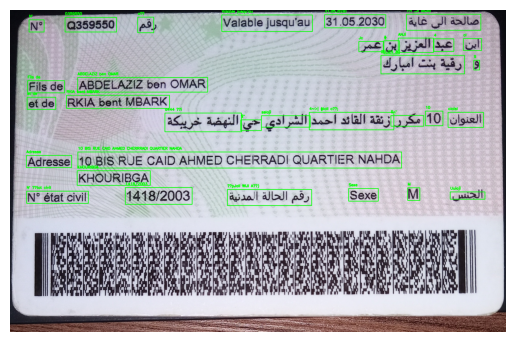

In [ ]:

import cv2
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import matplotlib.pyplot as plt
import easyocr



# Initialize the EasyOCR reader
reader = easyocr.Reader(['fr'])

# Load the image using OpenCV
image_path = 'cerped.jpg'
image = cv2.imread(image_path)

# Convert the image to RGB (EasyOCR works with RGB images)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Use EasyOCR to detect text in the image
results = reader.readtext(image_rgb)

# Draw bounding boxes around detected text and display the text
for (bbox, text, prob) in results:
    # Display the bounding box
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = (int(top_left[0]), int(top_left[1]))
    bottom_right = (int(bottom_right[0]), int(bottom_right[1]))
    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
    
    # Display the detected text
    print(f"Detected text: {text} (Confidence: {prob:.2f})")
    cv2.putText(image, text, (top_left[0], top_left[1] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the image with bounding boxes
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
